In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Encabezados del archivo

In [2]:
datos = pd.read_csv('pollution_us_2000_2016.csv')
list(datos)

['Unnamed: 0',
 'State Code',
 'County Code',
 'Site Num',
 'Address',
 'State',
 'County',
 'City',
 'Date Local',
 'NO2 Units',
 'NO2 Mean',
 'NO2 1st Max Value',
 'NO2 1st Max Hour',
 'NO2 AQI',
 'O3 Units',
 'O3 Mean',
 'O3 1st Max Value',
 'O3 1st Max Hour',
 'O3 AQI',
 'SO2 Units',
 'SO2 Mean',
 'SO2 1st Max Value',
 'SO2 1st Max Hour',
 'SO2 AQI',
 'CO Units',
 'CO Mean',
 'CO 1st Max Value',
 'CO 1st Max Hour',
 'CO AQI',
 'Unnamed: 29',
 'Unnamed: 30',
 'Unnamed: 31']

Numero de datos

In [3]:
datos.shape

(1048575, 32)

Las primeras 5 filas

In [4]:
datos.head()

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,01/01/2000,Parts per billion,...,21,13.0,Parts per million,1.145833,4.2,21,NaN,NaN,NaN,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,01/01/2000,Parts per billion,...,21,13.0,Parts per million,0.878947,2.2,23,25.0,NaN,NaN,NaN
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,01/01/2000,Parts per billion,...,23,NaN,Parts per million,1.145833,4.2,21,NaN,NaN,NaN,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,01/01/2000,Parts per billion,...,23,NaN,Parts per million,0.878947,2.2,23,25.0,NaN,NaN,NaN
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,02/01/2000,Parts per billion,...,22,4.0,Parts per million,0.850000,1.6,23,NaN,NaN,NaN,NaN


Todas las líneas

In [5]:
datos

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,01/01/2000,Parts per billion,...,21,13.0,Parts per million,1.145833,4.20,21,NaN,NaN,NaN,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,01/01/2000,Parts per billion,...,21,13.0,Parts per million,0.878947,2.20,23,25.0,NaN,NaN,NaN
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,01/01/2000,Parts per billion,...,23,NaN,Parts per million,1.145833,4.20,21,NaN,NaN,NaN,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,01/01/2000,Parts per billion,...,23,NaN,Parts per million,0.878947,2.20,23,25.0,NaN,NaN,NaN
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,02/01/2000,Parts per billion,...,22,4.0,Parts per million,0.850000,1.60,23,NaN,NaN,NaN,NaN
5,5,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,02/01/2000,Parts per billion,...,22,4.0,Parts per million,1.066667,2.30,0,26.0,NaN,NaN,NaN
6,6,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,02/01/2000,Parts per billion,...,23,NaN,Parts per million,0.850000,1.60,23,NaN,NaN,NaN,NaN
7,7,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,02/01/2000,Parts per billion,...,23,NaN,Parts per million,1.066667,2.30,0,26.0,NaN,NaN,NaN
8,8,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,03/01/2000,Parts per billion,...,19,16.0,Parts per million,1.929167,4.40,8,NaN,NaN,NaN,NaN
9,9,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,03/01/2000,Parts per billion,...,19,16.0,Parts per million,1.762500,2.50,8,28.0,NaN,NaN,NaN


# Transformación de datos

Los datos fueron transformados para ser de nuevo visualizados ya que en el formato original no se podían visualizar de manera correcta. Se crearon 4 archivos CSV los cuáles cuentan con la información necesaria de cada contaminante por lo que es más fácil su análisis

Se utilizó pig con los siguientes scripts:

```
inputfile= load '/user/cloudera/pollution_us_2000_2016.csv' using PigStorage(',');

NO2 = foreach inputfile generate $7 as ciudad, $8 as fecha, $9 as unidades, $10 as promedio;

store NO2 into '/user/cloudera/prueba_NO2' USING PigStorage (',');
```

```
inputfile= load '/user/cloudera/pollution_us_2000_2016.csv' using PigStorage(',');

NO2 = foreach inputfile generate $7 as ciudad, $8 as fecha, $14 as unidades, $15 as promedio;

store NO2 into '/user/cloudera/prueba_O3' USING PigStorage (',');
```

```
inputfile= load '/user/cloudera/pollution_us_2000_2016.csv' using PigStorage(',');

NO2 = foreach inputfile generate $7 as ciudad, $8 as fecha, $19 as unidades, $20 as promedio;

store NO2 into '/user/cloudera/prueba_SO2' USING PigStorage (',');
```

```
inputfile= load '/user/cloudera/pollution_us_2000_2016.csv' using PigStorage(',');

NO2 = foreach inputfile generate $7 as ciudad, $8 as fecha, $24 as unidades, $25 as promedio;

store NO2 into '/user/cloudera/prueba_CO' USING PigStorage (',');
```

In [6]:
co = pd.read_csv('CO/CO.csv', index_col = 0, parse_dates=True, usecols= ['CO Mean', 'Date Local'])
co.head()

,CO Mean
Date Local,
2000-01-01,1.145833
2000-01-01,0.878947
2000-01-01,1.145833
2000-01-01,0.878947
2000-02-01,0.850000


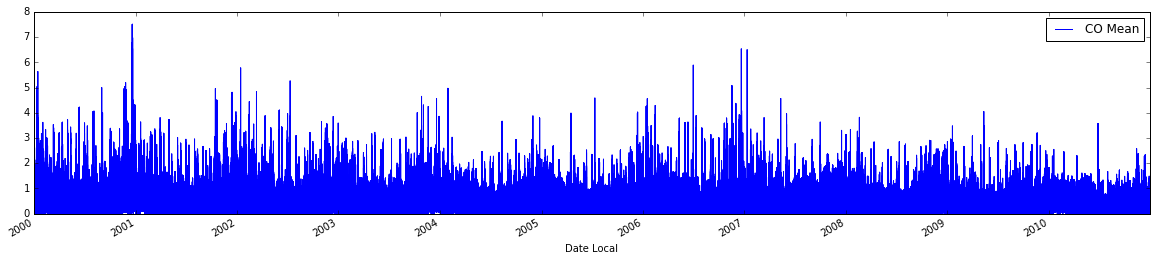

In [7]:
co.plot(figsize=(20,4))

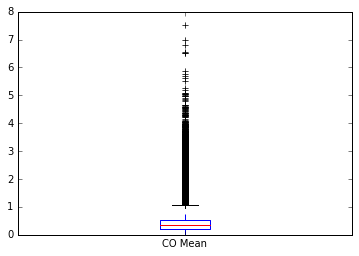

In [8]:
co.plot.box()

In [9]:
co.describe()

,CO Mean
count,1.048575e+06
mean,4.221252e-01
std,3.601106e-01
min,0.000000e+00
25%,2.000000e-01
50%,3.391300e-01
75%,5.416670e-01
max,7.508333e+00


In [10]:
ts_co = co.groupby([co.index.year,
                    co.index.month]).mean()

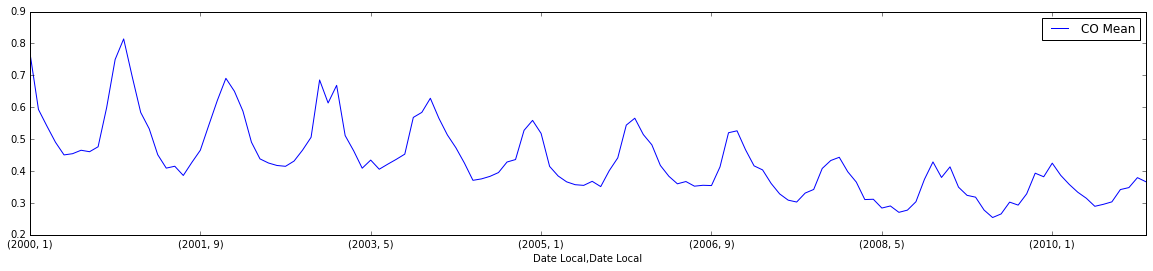

In [11]:
ts_co.plot(figsize= (20,4))

Se puede observar que existen periodos en los cuales el contaminante CO se hace presente, pero también se observa como cada vez existe menos contaminación de CO, los picos altos disminuyen su altura mientras pasa el tiempo.

## 1.- De esta gráfica se obtendrá cual es el promedio de contaminación en el año del 2000 y cúal es el promedio de contaminación en el 2010

In [12]:
no2 = pd.read_csv('NO2/NO2.csv', index_col = 0, parse_dates=True, usecols= ['NO2 Mean', 'Date Local'])
no2.head()

,NO2 Mean
Date Local,
2000-01-01,19.041667
2000-01-01,19.041667
2000-01-01,19.041667
2000-01-01,19.041667
2000-02-01,22.958333


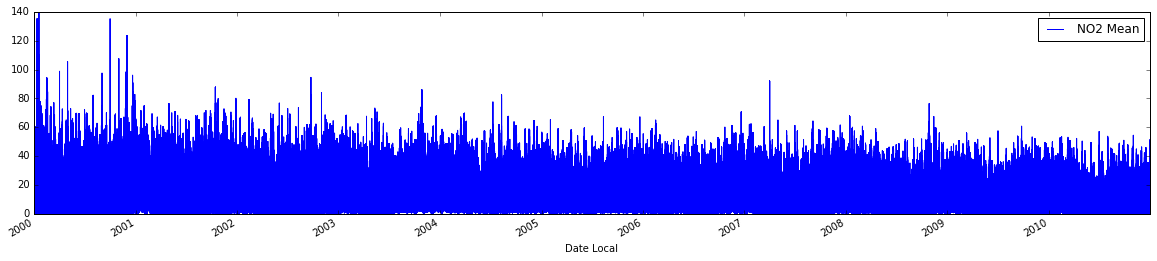

In [13]:
no2.plot(figsize=(20,4))

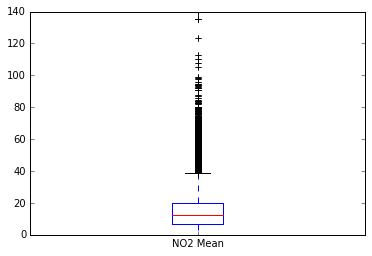

In [14]:
no2.plot.box()

In [15]:
no2.describe()

,NO2 Mean
count,1.048575e+06
mean,1.447425e+01
std,1.003320e+01
min,0.000000e+00
25%,7.086957e+00
50%,1.250000e+01
75%,1.975000e+01
max,1.395417e+02


In [16]:
ts_no2 = no2.groupby([no2.index.year,
                    no2.index.month]).mean()

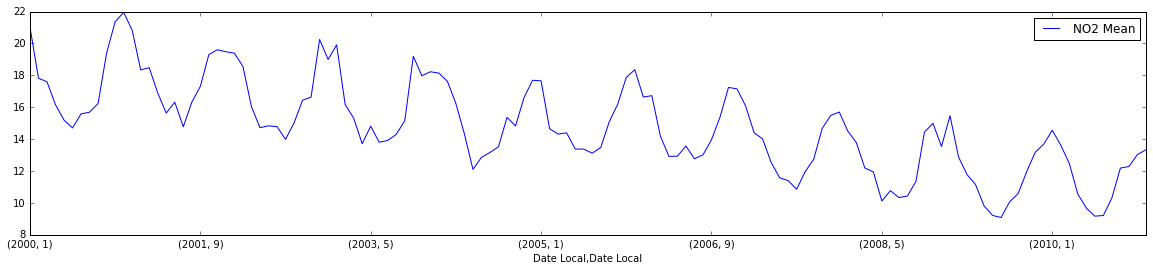

In [17]:
ts_no2.plot(figsize= (20,4))

Al igual que en el gráfico anterior en este gráfico se puede observar como hay periodos en los que baja la contaminación de NO2, pero a difeencia del gráfico anterior existe un alto índice de contaminación entre los años 2006 y 2008

## 2.- Se quiere investigar la ubicación y la fecha exacta en el que pasó el alto nivel de contaminación entre el 2006 y 2008

In [18]:
o3 = pd.read_csv('O3/O3.csv', index_col = 0, parse_dates=True, usecols= ['O3 Mean', 'Date Local'])
o3.head()

,O3 Mean
Date Local,
2000-01-01,0.022500
2000-01-01,0.022500
2000-01-01,0.022500
2000-01-01,0.022500
2000-02-01,0.013375


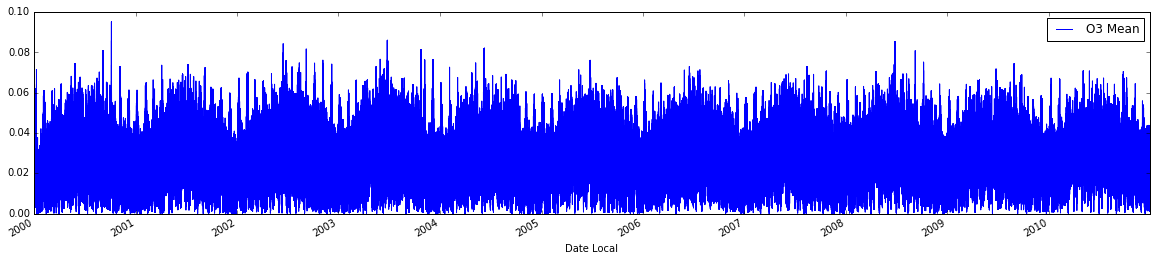

In [19]:
o3.plot(figsize=(20,4))

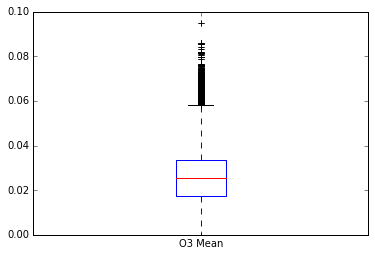

In [20]:
o3.plot.box()

In [21]:
o3.describe()

,O3 Mean
count,1.048575e+06
mean,2.574110e-02
std,1.165894e-02
min,0.000000e+00
25%,1.720800e-02
50%,2.545800e-02
75%,3.366700e-02
max,9.508300e-02


In [22]:
ts_o3 = o3.groupby([o3.index.year,
                    o3.index.month]).mean()

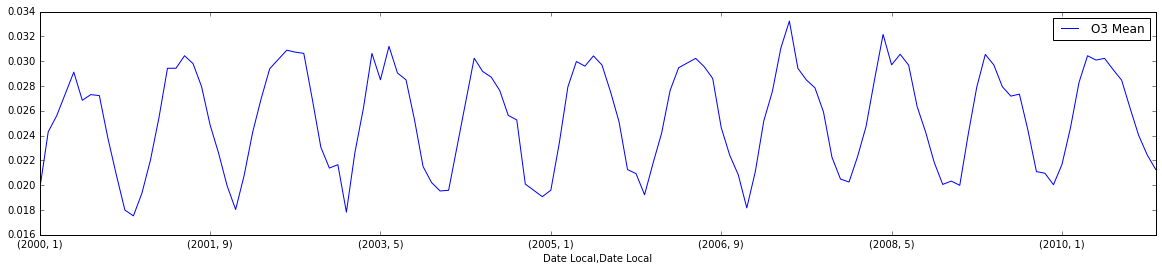

In [23]:
ts_o3.plot(figsize= (20,4))

En este gráfico a diferencia de los otros dos no existe alguna disminución de contaminación a travez del tiempo, aunque si existe una periodicidad.

## 3.- De aqui se quiere obtener cuál es la ciudad más contaminada en O3

In [24]:
so2 = pd.read_csv('SO2/SO2.csv', index_col = 0, parse_dates=True, usecols= ['SO2 Mean', 'Date Local'])
so2.head()

,SO2 Mean
Date Local,
2000-01-01,3.000000
2000-01-01,3.000000
2000-01-01,2.975000
2000-01-01,2.975000
2000-02-01,1.958333


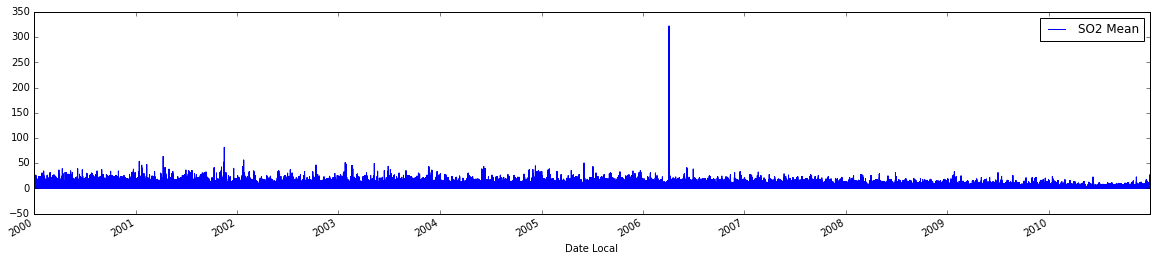

In [25]:
so2.plot(figsize=(20,4))

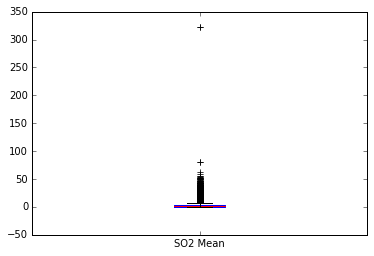

In [26]:
so2.plot.box()

In [27]:
so2.describe()

,SO2 Mean
count,1.048575e+06
mean,2.488623e+00
std,3.220715e+00
min,-4.545450e-01
25%,4.571430e-01
50%,1.425000e+00
75%,3.291667e+00
max,3.216250e+02


In [28]:
ts_so2 = so2.groupby([so2.index.year,
                    so2.index.month]).mean()

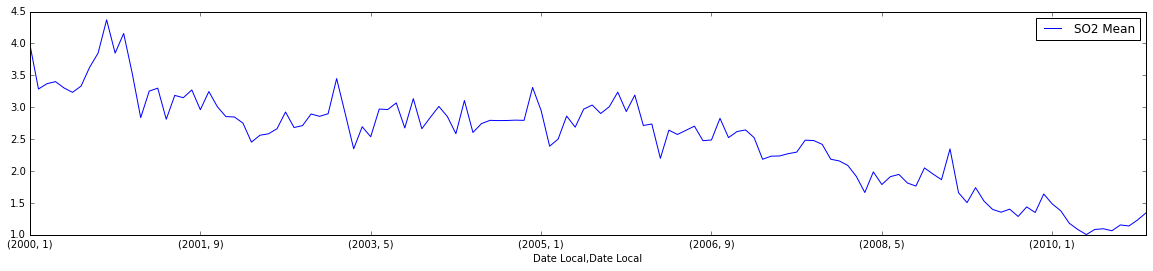

In [29]:
ts_so2.plot(figsize= (20,4))

Al parecer en este gráfico tenemos un dato exageradamente alto, mostranto un comportamiento muy parecido al de las gráficas 1 y 2 siendo periódico y disminuyendo la contaminación de SO2. Solo que en este gráfico se puede observar que en ocaciones la contaminación disminuye drásticamente y de nuevo vuelve a subir drásticamente

## 4.- De esta gráfica se tiene que identificar el dato que se muestra exagerado y eliminarlo para poder observar bien la gráfica

## 5.- Se quiere obtener el promedio de contaminación de SO2 de cada mes

In [30]:
from pymongo import MongoClient
import json
conn = MongoClient()
db = conn.Pollution
for row in datos.iterrows():
    db.pollution.insert_one({'city': row[1]['City'],
                     'address': row[1]['Address'],
                     'date_local': row[1]['Date Local'],
                     'co_units': row[1]['CO Units'],
                     'co_mean': row[1]['CO Mean'],
                     'no2_units': row[1]['NO2 Units'],
                     'no2_mean': row[1]['NO2 Mean'],
                     'o3_units': row[1]['O3 Units'],
                     'o3_mean': row[1]['O3 Mean'],
                     'so2_units': row[1]['SO2 Units'],
                     'so2_mean': row[1]['SO2 Mean']
                     })

## Obtener cual es el promedio de contaminación en el año del 2000 y cúal es el promedio de contaminación en el 2010

In [31]:
from bson.code import Code
mapFunc = Code("""function(){
        if (this.date_local.endsWith("2000")){
            emit("2000",this.co_mean);
        }else if (this.date_local.endsWith(2010)){
            emit("2010",this.co_mean);        
        }
}""")
reduceFunc = Code("""function(palabras, values){
                 var res = 0;
                 values.forEach(function(v){ res += v})
                 return res / values.length;
}""")
db.pollution.map_reduce(mapFunc,reduceFunc,"co", full_response = True)
promedios = db.co.find()
print("Promedio en 2000: " + str(promedios[0]["value"]))
print("Promedio en 2010: " + str(promedios[1]["value"]))

Promedio en 2000: 0.828428973958
Promedio en 2010: 0.278272122405


## Investigar la ubicación y la fecha exacta en el que pasó el alto nivel de contaminación entre el 2006 y 2008

In [32]:
from bson.code import Code
mapFunc = Code("""function(){
        var fecha = new Date(this.date_local);
        var dosmilseis = new Date("2006-01-01")
        var dosmilocho = new Date("2008-12-31")
        if (fecha > dosmilseis && fecha < dosmilocho){
            emit("mayor",this.no2_mean);
        }
}""")
reduceFunc = Code("""function(palabras, values){
                 var res = 0;
                 values.forEach(function(v){
                     if (res < v)
                     res = v;
                 })
                 return res;
}""")
db.pollution.map_reduce(mapFunc,reduceFunc,"no2", full_response = True)
consulta = db.no2.find()
nivel_alto = consulta[0]["value"]
print("Nivel: " + str(nivel_alto))
ciudad = db.pollution.find({"no2_mean": nivel_alto})[1]
print("Fecha: " + ciudad["date_local"])
print("Ubicacion: " + ciudad["address"] + " " + ciudad["city"])

Nivel: 92.0
Fecha: 04/02/2007
Ubicacion: 3174 E. 78TH AVE. Welby


## Obtener cuál es la ciudad más contaminada en O3

In [33]:
from bson.code import Code
mapFunc = Code("""function(){
            emit(this.city,this.o3_mean);
}""")
reduceFunc = Code("""function(palabras, values){
                 var res = 0;
                 values.forEach(function(v){ res += v})
                 return res / values.length;
}""")
db.pollution.map_reduce(mapFunc,reduceFunc,"o3", full_response = True)
consulta = db.o3.find()
mayor = 0
ciudad = ""
for data in consulta:
    if mayor < data["value"]:
        mayor = data["value"]
        ciudad = data["_id"]
print("La ciudad mas contaminada de O3 " + ciudad + " con " + str(mayor) + " de promedio")

La ciudad mas contaminada de O3 Vandenberg Air Force Base con 0.0362504912316 de promedio


## Identificar el dato que se muestra exagerado y eliminarlo para poder observar bien la gráfica

In [34]:
mapFunc = Code("""function(){
            emit("mayor",this.so2_mean);
}""")
reduceFunc = Code("""function(palabras, values){
                 var res = 0;
                 values.forEach(function(v){
                     if (res < v)
                     res = v;
                 })
                 return res;
}""")
db.pollution.map_reduce(mapFunc,reduceFunc,"so2", full_response = True)
consulta = db.so2.find()
nivel_alto = consulta[0]["value"]
print("Nivel: " + str(nivel_alto))
ciudad = db.pollution.find({"so2_mean": nivel_alto})[1]
print("Fecha: " + ciudad["date_local"])
print("Ubicacion: " + ciudad["address"] + " " + ciudad["city"])
db.pollution.delete_one({"so2": nivel_alto})

Nivel: 321.625
Fecha: 04/05/2006
Ubicacion: P.O. BOX 948   TAHLEQUAH  OK  74464 Park Hill


In [35]:
mapFunc = Code("""function(){
            emit("mayor",this.so2_mean);
}""")
reduceFunc = Code("""function(palabras, values){
                 var res = 0;
                 values.forEach(function(v){
                     if (res < v)
                     res = v;
                 })
                 return res;
}""")
db.pollution.map_reduce(mapFunc,reduceFunc,"so2", full_response = True)
consulta = db.so2.find()
nivel_alto = consulta[0]["value"]
print("Nivel: " + str(nivel_alto))
ciudad = db.pollution.find({"so2_mean": nivel_alto})[1]
print("Fecha: " + ciudad["date_local"])
print("Ubicacion: " + ciudad["address"] + " " + ciudad["city"])

Nivel: 321.625
Fecha: 04/05/2006
Ubicacion: P.O. BOX 948   TAHLEQUAH  OK  74464 Park Hill


In [36]:
db.pollution.delete_one({"so2_mean": nivel_alto})

In [37]:
mapFunc = Code("""function(){
        var meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'];
        var fecha = new Date(this.date_local);
        emit(meses[fecha.getMonth()], this.so2_mean)
}""")
reduceFunc = Code("""function(palabras, values){
                 var res = 0;
                 values.forEach(function(v){
                     res = res + v;
                 })
                 return res / values.length;
}""")
db.pollution.map_reduce(mapFunc,reduceFunc,"so2_2", full_response = True)
resultado = db.so2_2.find()
for row in resultado:
    print(row["_id"] + ":\t" + str(row['value']))

Abr:	1.10628857955
Ago:	1.4121831578
Dic:	1.01517225684
Ene:	0.721533579037
Feb:	0.941853953752
Jul:	1.10139922463
Jun:	1.3004455541
Mar:	1.18347614587
May:	0.934242239648
Nov:	1.38267001027
Oct:	1.15906134442
Sep:	1.21059101679
